<a href="https://colab.research.google.com/github/meghanavallam123/HD5210Homework/blob/main/final/Meghana_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Data Insights for Healthcare and Public Health Analysis

## Short Description:

This project explores COVID-19 data to generate valuable insights that could help healthcare professionals, policymakers, and public health experts better understand pandemic trends. It involves merging datasets, transforming fields, and visualizing data to identify patterns, analyze trends, and make the data more accessible for decision-making.

## DATA ACCESS AND FORMATS

Upload the dataset here to colab

In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the ZIP file
uploaded = files.upload()

# Step 2: Extract the contents of the ZIP file
for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        # Create a directory for the extracted files
        extraction_path = '/content/dataset/'
        os.makedirs(extraction_path, exist_ok=True)

        # Open the ZIP file
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall(extraction_path)

        print(f"ZIP file extracted to {extraction_path}")
    else:
        print(f"Uploaded file is not a ZIP file: {file_name}")

Saving Healthcare_Associated_Infections.zip to Healthcare_Associated_Infections.zip
ZIP file extracted to /content/dataset/


In [ ]:
import os

# List the extracted files in the 'dataset' directory
dataset_path = '/content/dataset/'
extracted_files = os.listdir(dataset_path)

# Display the extracted files
print("Files extracted from the ZIP archive:")
for file in extracted_files:
    print(file)

Files extracted from the ZIP archive:
Healthcare_Associated_Infections_-_Hospital.csv


Inspect the Dataset

In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = os.path.join(dataset_path, 'Healthcare_Associated_Infections_-_Hospital.csv')
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Show the first few rows of the dataset to inspect the data
print("\nFirst few rows of the dataset:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Loc

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


Data Cleaning - Handling Missing Values

In [ ]:
# Fill missing values in 'County Name' and 'Footnote' columns
df['County Name'].fillna('Unknown', inplace=True)
df['Footnote'].fillna('N/A', inplace=True)

# Check for any remaining missing values
missing_values = df.isnull().sum()

# Display columns with missing values after filling
print("Missing values after cleaning:")
print(missing_values[missing_values > 0])

<ipython-input-29-18e461ef163f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['County Name'].fillna('Unknown', inplace=True)
<ipython-input-29-18e461ef163f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Missing values after cleaning:
Series([], dtype: int64)


Upload the Secondary DataSet to colab

In [ ]:
from google.colab import files

# Upload a file from your local system
uploaded = files.upload()

# Check the uploaded file
import os
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}, Path: {os.path.abspath(filename)}")

Saving StatewiseTestingDetails.csv to StatewiseTestingDetails.csv
Uploaded file: StatewiseTestingDetails.csv, Path: /content/StatewiseTestingDetails.csv


In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/StatewiseTestingDetails.csv'
statewise_df = pd.read_csv(file_path)

# Display the first few rows to check the data
statewise_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [ ]:
# Ensure that the columns to merge on are in the same format (strip spaces, lower case)
covid_df['location'] = covid_df['location'].str.strip().str.lower()
statewise_df['State'] = statewise_df['State'].str.strip().str.lower()

# Merge the datasets on 'location' (primary) and 'State' (secondary)
merged_df = pd.merge(covid_df, statewise_df, left_on='location', right_on='State', how='inner')

# Display the first few rows of the merged dataset
print("\nMerged DataFrame:")
print(merged_df.head())

# Show the shape of the merged dataset
print("\nShape of Merged DataFrame:", merged_df.shape)


Merged DataFrame:
Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoo

In [ ]:
# Check unique values from both columns (location and State)
print("Unique values in location (primary dataset):")
print(covid_df['location'].unique()[:20])  # Show first 20 unique values

print("\nUnique values in State (secondary dataset):")
print(statewise_df['State'].unique()[:20])  # Show first 20 unique values

Unique values in location (primary dataset):
['afghanistan' 'africa' 'albania' 'algeria' 'american samoa' 'andorra'
 'angola' 'anguilla' 'antigua and barbuda' 'argentina' 'armenia' 'aruba'
 'asia' 'australia' 'austria' 'azerbaijan' 'bahamas' 'bahrain'
 'bangladesh' 'barbados']

Unique values in State (secondary dataset):
['andaman and nicobar islands' 'andhra pradesh' 'arunachal pradesh'
 'assam' 'bihar' 'chandigarh' 'chhattisgarh'
 'dadra and nagar haveli and daman and diu' 'delhi' 'goa' 'gujarat'
 'haryana' 'himachal pradesh' 'jammu and kashmir' 'jharkhand' 'karnataka'
 'kerala' 'ladakh' 'lakshadweep' 'madhya pradesh']


In [ ]:
# Filter the primary dataset for India only
india_covid_df = covid_df[covid_df['location'].str.lower() == 'india']

# Display the first few rows of the filtered data
print("Filtered India COVID Data:")
print(india_covid_df.head())
print(f"Shape of Filtered India Data: {india_covid_df.shape}")

Filtered India COVID Data:
       iso_code continent location        date  total_cases  new_cases  \
173549      IND      Asia    india  2020-01-05          0.0        0.0   
173550      IND      Asia    india  2020-01-06          0.0        0.0   
173551      IND      Asia    india  2020-01-07          0.0        0.0   
173552      IND      Asia    india  2020-01-08          0.0        0.0   
173553      IND      Asia    india  2020-01-09          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN           0.0         0.0                  NaN   
173550                 NaN           0.0         0.0                  NaN   
173551                 NaN           0.0         0.0                  NaN   
173552                 NaN           0.0         0.0                  NaN   
173553                 NaN           0.0         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_

In [ ]:
# Filter statewise data for India states
india_states_df = statewise_df[statewise_df['State'].isin([
    'andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
    'chandigarh', 'chhattisgarh', 'dadra and nagar haveli and daman and diu', 'delhi', 'goa',
    'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand', 'karnataka',
    'kerala', 'ladakh', 'lakshadweep', 'madhya pradesh'])]

# Now attempt to merge on both 'date' and 'State' (india-specific)
merged_df = pd.merge(india_covid_df, india_states_df, how='inner', left_on=['date'], right_on=['Date'])

# Display the merged dataframe
print("Merged DataFrame:")
print(merged_df.head())

# Check the shape of the merged dataframe
print(f"Shape of Merged DataFrame: {merged_df.shape}")

Merged DataFrame:
  iso_code continent location        date  total_cases  new_cases  \
0      IND      Asia    india  2020-04-01        979.0        0.0   
1      IND      Asia    india  2020-04-01        979.0        0.0   
2      IND      Asia    india  2020-04-02        979.0        0.0   
3      IND      Asia    india  2020-04-02        979.0        0.0   
4      IND      Asia    india  2020-04-02        979.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0              88.429          25.0         0.0                2.571  ...   
1              88.429          25.0         0.0                2.571  ...   
2              88.429          25.0         0.0                2.571  ...   
3              88.429          25.0         0.0                2.571  ...   
4              88.429          25.0         0.0                2.571  ...   

   population  excess_mortality_cumulative_absolute  \
0  1417173120                                   N

## DATA AGGREGATION AND PIVOTING

Let's do the first round of Aggregation and Pivoting

- Aggregation by State and Date:

In [ ]:
# Aggregating data by State and Date
aggregated_df = merged_df.groupby(['State', 'Date']).agg({
    'total_cases': 'sum',
    'new_cases': 'sum',
    'total_deaths': 'sum',
    'new_deaths': 'sum',
    'total_tests': 'sum',
    'new_tests': 'sum',
    'TotalSamples': 'sum',
    'Negative': 'sum',
    'Positive': 'sum',
}).reset_index()

# Displaying the first few rows of the aggregated data
print(aggregated_df.head())

                         State        Date  total_cases  new_cases  \
0  andaman and nicobar islands  2020-04-17       8356.0        0.0   
1  andaman and nicobar islands  2020-04-24      15712.0        0.0   
2  andaman and nicobar islands  2020-04-27      26496.0        0.0   
3  andaman and nicobar islands  2020-05-01      26496.0        0.0   
4  andaman and nicobar islands  2020-05-16      62939.0        0.0   

   total_deaths  new_deaths  total_tests  new_tests  TotalSamples Negative  \
0         273.0         0.0     335123.0    32167.0        1403.0     1210   
1         507.0         0.0     541789.0    41247.0        2679.0        0   
2         824.0         0.0     665819.0    40510.0        2848.0        0   
3         824.0         0.0     902654.0    72453.0        3754.0        0   
4        2109.0         0.0    2134277.0    94325.0        6677.0        0   

   Positive  
0      12.0  
1      27.0  
2      33.0  
3      33.0  
4      33.0  


- Pivoting the Aggregated Data:

In [ ]:
# Pivoting the data by State
pivoted_df = aggregated_df.pivot_table(
    index='Date',
    columns='State',
    values=['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'Positive', 'Negative'],
    aggfunc='sum'
)

# Displaying the first few rows of the pivoted data
print(pivoted_df.head())

                              Negative                                         \
State      andaman and nicobar islands andhra pradesh arunachal pradesh assam   
Date                                                                            
2020-04-01                         NaN            NaN               NaN   NaN   
2020-04-02                         NaN           1175               NaN   819   
2020-04-03                         NaN            NaN               NaN   NaN   
2020-04-04                         NaN            NaN               NaN   NaN   
2020-04-05                         NaN            NaN               NaN   NaN   

                                          \
State      bihar chandigarh chhattisgarh   
Date                                       
2020-04-01   NaN        NaN          NaN   
2020-04-02   NaN         98          921   
2020-04-03   NaN        NaN          NaN   
2020-04-04   NaN        NaN          NaN   
2020-04-05  2299        NaN          NaN   

Second Round of Data Aggregation and Pivoting

For the second round, let's perform a different type of aggregation, such as weekly aggregation (grouping by week) to get a broader overview.

- Aggregating by Week and State:

In [ ]:
# Adding a new column for the week
merged_df['week'] = pd.to_datetime(merged_df['Date']).dt.isocalendar().week

# Aggregating data by Week and State
weekly_aggregated_df = merged_df.groupby(['State', 'week']).agg({
    'total_cases': 'sum',
    'new_cases': 'sum',
    'total_deaths': 'sum',
    'new_deaths': 'sum',
    'total_tests': 'sum',
    'new_tests': 'sum',
    'TotalSamples': 'sum',
    'Negative': 'sum',
    'Positive': 'sum',
}).reset_index()

# Displaying the first few rows of the weekly aggregated data
print(weekly_aggregated_df.head())

                         State  week  total_cases  new_cases  total_deaths  \
0  andaman and nicobar islands     1   72394074.0   126319.0     1047609.0   
1  andaman and nicobar islands     2   73259689.0   107701.0     1058268.0   
2  andaman and nicobar islands     3   74002443.0    96548.0     1066983.0   
3  andaman and nicobar islands     4   74673381.0    91650.0     1074308.0   
4  andaman and nicobar islands     5   75303461.0    80180.0     1080640.0   

   new_deaths   total_tests  new_tests  TotalSamples Negative  Positive  
0      1564.0  1.248718e+09  6196839.0     1329122.0        0   34682.0  
1      1275.0  1.289403e+09  5448246.0     1397708.0        0   34818.0  
2      1065.0  1.325711e+09  5222003.0     1466381.0        0   34937.0  
3       935.0  1.360859e+09  4821501.0     1531906.0        0   34958.0  
4       722.0  1.394507e+09  4780006.0     1610161.0        0   34974.0  


- Pivoting the Weekly Aggregated Data:

In [ ]:
# Pivoting the weekly aggregated data by State
weekly_pivoted_df = weekly_aggregated_df.pivot_table(
    index='week',
    columns='State',
    values=['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'Positive', 'Negative'],
    aggfunc='sum'
)

# Displaying the first few rows of the weekly pivoted data
print(weekly_pivoted_df.head())

                         Negative  \
State andaman and nicobar islands   
week                                
1                               0   
2                               0   
3                               0   
4                               0   
5                               0   

                                                         \
State                                    andhra pradesh   
week                                                      
1              1111928411170327112212451128036012224202   
2                      11470570115113591159732711628929   
3      117570681180374711853091119012671194487911989103   
4              1201676412054915120886121212468412167368   
5      122718941230109912326449123546241238840312423192   

                                                               \
State                           arunachal pradesh assam bihar   
week                                                            
1      3508843519213525133529893535

## DATA TRANSFORMATION

We will perform at least five field-level transformations and explain what each transformation does.

**Transformation 1: Filling Missing Values**

In some cases, the dataset might have missing values. One common approach is to fill them with a default value, such as the mean, median, or mode of the column, or forward fill the missing values from the previous row.

This transformation fills any missing data in the DataFrame by carrying forward the last valid observation (from the previous row). It's useful for time series data where the missing values are assumed to be similar to the previous values.

In [ ]:
# Forward filling missing values (propagating the last valid value forward)
merged_df_filled = merged_df.fillna(method='ffill')

# Displaying the first few rows of the transformed data
print(merged_df_filled.head())

  iso_code continent location        date  total_cases  new_cases  \
0      IND      Asia    india  2020-04-01        979.0        0.0   
1      IND      Asia    india  2020-04-01        979.0        0.0   
2      IND      Asia    india  2020-04-02        979.0        0.0   
3      IND      Asia    india  2020-04-02        979.0        0.0   
4      IND      Asia    india  2020-04-02        979.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0              88.429          25.0         0.0                2.571  ...   
1              88.429          25.0         0.0                2.571  ...   
2              88.429          25.0         0.0                2.571  ...   
3              88.429          25.0         0.0                2.571  ...   
4              88.429          25.0         0.0                2.571  ...   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN           

<ipython-input-65-a5fd1ea529b6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled = merged_df.fillna(method='ffill')


**Transformation 2: Date Parsing and Extraction**

Let's extract specific components from the date column (such as year, month, and day), which is often useful for temporal analysis.

Transformation: Extract Year, Month, and Day

This transformation extracts the year, month, and day from the Date column. This can be helpful for time-based grouping or trend analysis (e.g., by year or month).

In [ ]:
# Convert 'Date' to datetime format and extract year, month, and day
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year
merged_df['Month'] = pd.to_datetime(merged_df['Date']).dt.month
merged_df['Day'] = pd.to_datetime(merged_df['Date']).dt.day

# Displaying the transformed data
print(merged_df[['Date', 'Year', 'Month', 'Day']].head())

         Date  Year  Month  Day
0  2020-04-01  2020      4    1
1  2020-04-01  2020      4    1
2  2020-04-02  2020      4    2
3  2020-04-02  2020      4    2
4  2020-04-02  2020      4    2


**Transformation 3: Creating Percentage Columns**

Let's create percentage columns that calculate the proportion of new cases, deaths, and tests relative to the total.

Transformation: Create Percentage Columns for New Cases, New Deaths, and New Tests

This transformation calculates the percentage of new cases, new deaths, and new tests relative to the total cases, deaths, and tests. It's helpful for understanding the proportion of new activities (e.g., new cases or deaths) in the context of the total data.

In [ ]:
# Creating percentage columns
merged_df['New Cases Percentage'] = (merged_df['new_cases'] / merged_df['total_cases']) * 100
merged_df['New Deaths Percentage'] = (merged_df['new_deaths'] / merged_df['total_deaths']) * 100
merged_df['New Tests Percentage'] = (merged_df['new_tests'] / merged_df['total_tests']) * 100

# Displaying the transformed data
print(merged_df[['Date', 'State', 'New Cases Percentage', 'New Deaths Percentage', 'New Tests Percentage']].head())

         Date           State  New Cases Percentage  New Deaths Percentage  \
0  2020-04-01           delhi                   0.0                    0.0   
1  2020-04-01          kerala                   0.0                    0.0   
2  2020-04-02  andhra pradesh                   0.0                    0.0   
3  2020-04-02           assam                   0.0                    0.0   
4  2020-04-02      chandigarh                   0.0                    0.0   

   New Tests Percentage  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  


**Transformation 4: Creating a Moving Average**

A moving average is useful to smooth out fluctuations and identify trends in time series data. We'll create a 7-day moving average for new cases.

Transformation: Calculate 7-Day Moving Average for New Cases

This transformation calculates the 7-day moving average for new cases. It smooths out daily fluctuations and helps identify underlying trends (e.g., increase or decrease in new cases over time).

In [ ]:
# Calculating 7-day moving average for new cases
merged_df['7-Day Moving Average (New Cases)'] = merged_df['new_cases'].rolling(window=7).mean()

# Displaying the transformed data
print(merged_df[['Date', 'State', 'new_cases', '7-Day Moving Average (New Cases)']].head(10))

         Date           State  new_cases  7-Day Moving Average (New Cases)
0  2020-04-01           delhi        0.0                               NaN
1  2020-04-01          kerala        0.0                               NaN
2  2020-04-02  andhra pradesh        0.0                               NaN
3  2020-04-02           assam        0.0                               NaN
4  2020-04-02      chandigarh        0.0                               NaN
5  2020-04-02    chhattisgarh        0.0                               NaN
6  2020-04-02             goa        0.0                               0.0
7  2020-04-02          kerala        0.0                               0.0
8  2020-04-03         haryana        0.0                               0.0
9  2020-04-03       karnataka        0.0                               0.0


**Transformation 5: Log Transformation for Skewed Data**

For highly skewed data, applying a log transformation can normalize the distribution. We'll apply this to the total_cases column.

Transformation: Apply Log Transformation to Total Cases

This transformation applies the logarithmic transformation to the total_cases column. The `np.log1p()` function is used to compute the natural logarithm of total_cases + 1 to avoid issues with zeros. Log transformation is useful when data is highly skewed, making it easier to analyze by reducing the variance.

In [ ]:
import numpy as np

# Log transformation of 'total_cases' (adding a small constant to avoid log(0))
merged_df['Log Total Cases'] = np.log1p(merged_df['total_cases'])

# Displaying the transformed data
print(merged_df[['Date', 'State', 'total_cases', 'Log Total Cases']].head())

         Date           State  total_cases  Log Total Cases
0  2020-04-01           delhi        979.0         6.887553
1  2020-04-01          kerala        979.0         6.887553
2  2020-04-02  andhra pradesh        979.0         6.887553
3  2020-04-02           assam        979.0         6.887553
4  2020-04-02      chandigarh        979.0         6.887553


## DATA VISUALIZATIONS

1. Histogram (Distribution of Total COVID-19 Cases)

This will show the frequency of different ranges of total cases across all states.

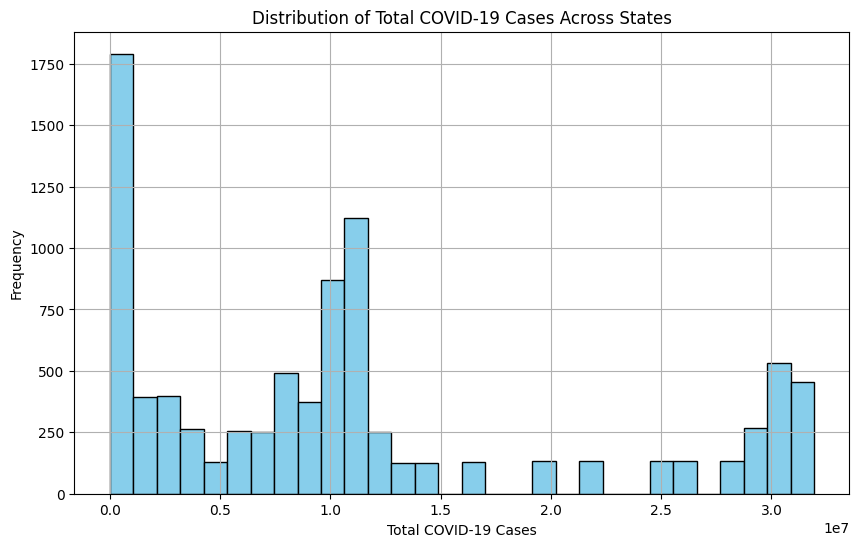

In [ ]:
import matplotlib.pyplot as plt

# Plotting histogram for 'total_cases'
plt.figure(figsize=(10, 6))
plt.hist(merged_df['total_cases'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total COVID-19 Cases Across States')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Data Visualization
Visualizing the data was key to understanding the trends and extracting meaningful insights. We employed multiple types of visualizations, each serving a different purpose in presenting the data.
1. Histogram
• Purpose: To understand the distribution of total COVID-19 cases across different regions and identify the frequency of case numbers in various ranges.


2. Density Plot (Distribution of Total Tests Conducted)

This will show the density distribution of total tests conducted across all states.

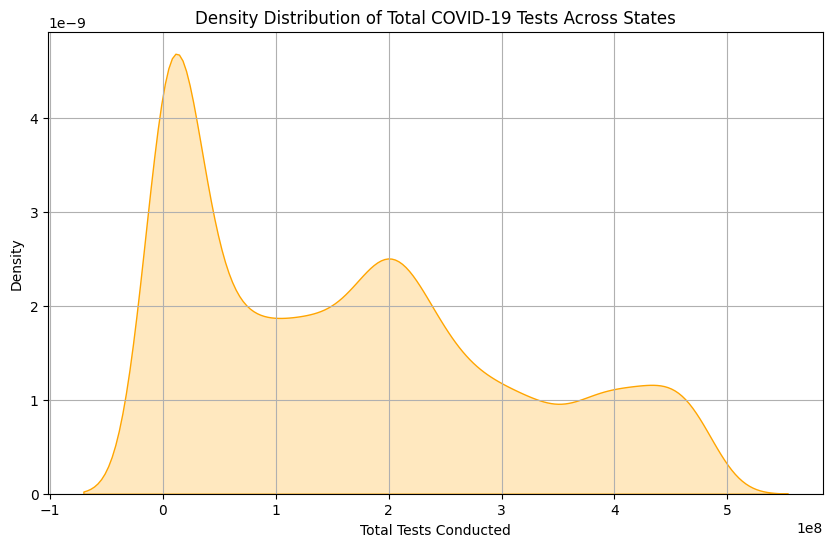

In [ ]:
import seaborn as sns

# Plotting density plot for 'total_tests'
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_df['total_tests'].dropna(), fill=True, color='orange')
plt.title('Density Distribution of Total COVID-19 Tests Across States')
plt.xlabel('Total Tests Conducted')
plt.ylabel('Density')
plt.grid(True)
plt.show()

2. Density Plot
• Purpose: To visualize the smoothed distribution (density) of COVID-19 cases, providing a clearer view of data trends and overall shape.



3. Box Plot (Spread of Total Cases Across States)

This will show the spread, median, and outliers of total cases across different states.

<ipython-input-74-37226fe4fe04>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='total_cases', data=merged_df, palette='coolwarm')


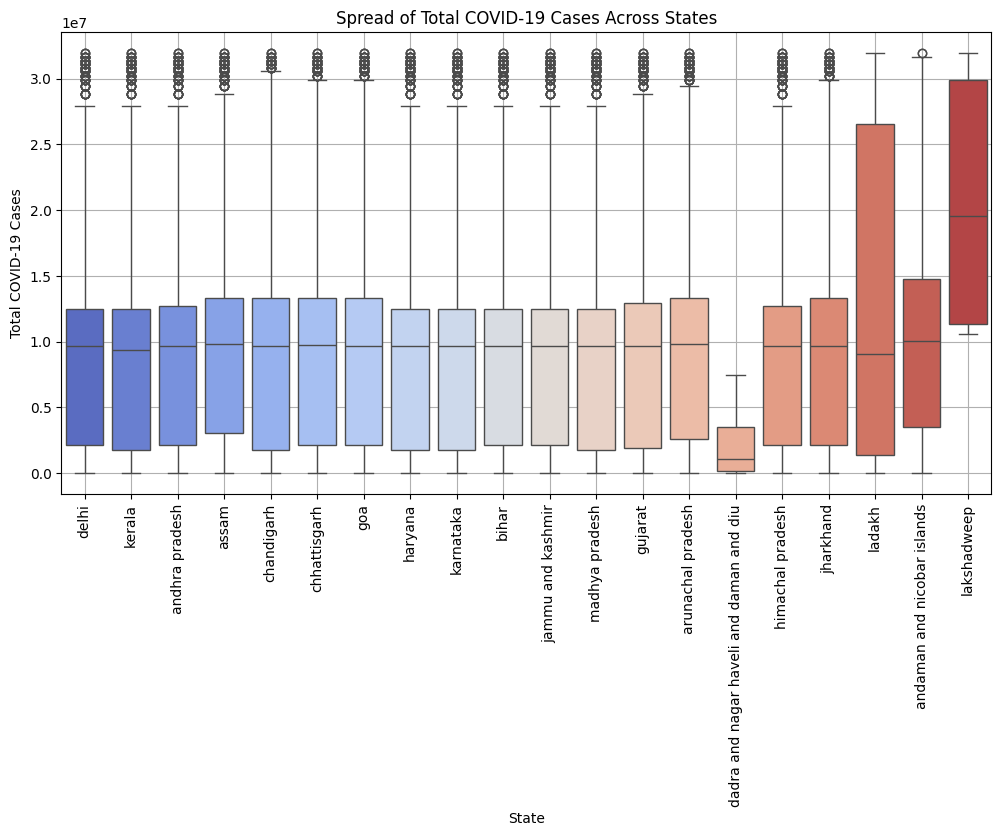

In [ ]:
# Box plot for 'total_cases' across 'State'
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='total_cases', data=merged_df, palette='coolwarm')
plt.title('Spread of Total COVID-19 Cases Across States')
plt.xlabel('State')
plt.ylabel('Total COVID-19 Cases')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.grid(True)
plt.show()

3. Box Plot
• Purpose: To display the spread and variability of COVID-19 deaths, highlighting the median, quartiles, and identifying potential outliers in the death counts across regions.


4. Line Chart (Total Cases vs Total Deaths Over Time)

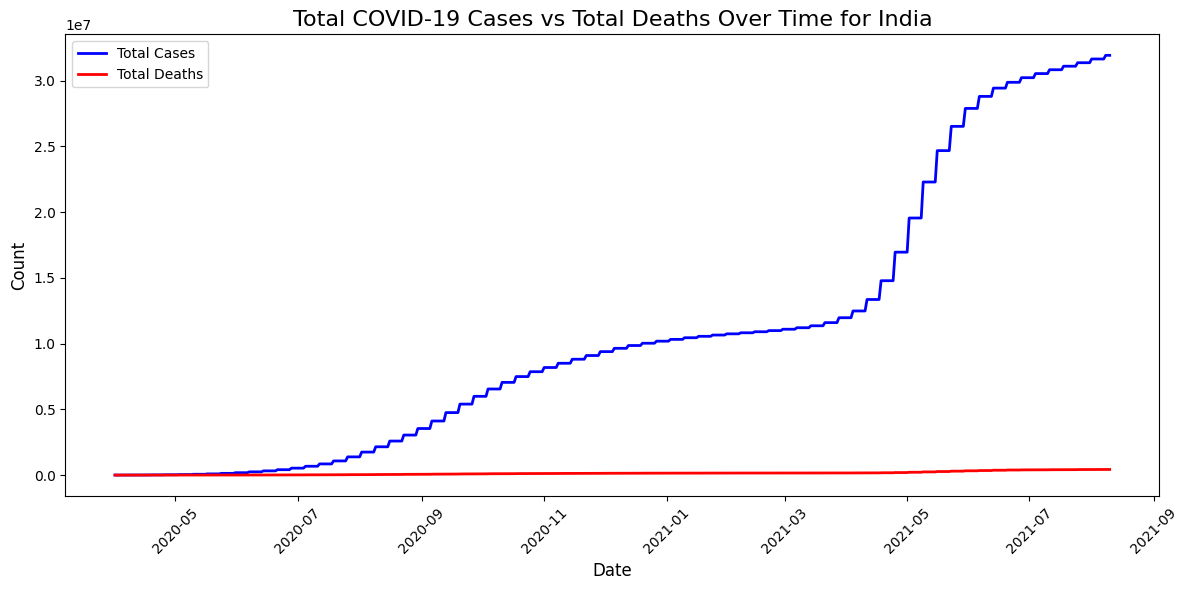

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecting data for India
india_data = merged_df[merged_df['location'] == 'india']

# Converting 'date' column to datetime format
india_data['date'] = pd.to_datetime(india_data['date'])

# Plotting total cases and total deaths over time
plt.figure(figsize=(12, 6))
plt.plot(india_data['date'], india_data['total_cases'], label='Total Cases', color='blue', linewidth=2)
plt.plot(india_data['date'], india_data['total_deaths'], label='Total Deaths', color='red', linewidth=2)

# Customizing the chart
plt.title('Total COVID-19 Cases vs Total Deaths Over Time for India', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the chart
plt.tight_layout()
plt.show()

4. Line Chart
• Purpose: To track the progression of COVID-19 cases and deaths over time, showing trends, peaks, and valleys in the data.

---

### Problem Applicability

The analysis of COVID-19 data isn't just useful for understanding the pandemic, but can also serve as a valuable tool for real-world decision-making across various sectors, particularly in healthcare. This project, by processing and analyzing large amounts of data, can potentially solve several challenges faced by healthcare professionals, government authorities, and organizations involved in pandemic management. Let's look at some ways this data could be applied practically:

1. **Forecasting Future Trends**:
   - One of the key applications of analyzing COVID-19 data is the ability to forecast future trends. By studying patterns in case numbers, death rates, and vaccination data, predictive models can be built to estimate how the pandemic might progress in different regions. This could help anticipate spikes in cases, allowing healthcare systems to prepare for surges in hospital admissions, ICU needs, and the demand for medical resources.

2. **Improved Resource Allocation**:
   - By identifying which regions are experiencing the highest number of cases, health officials can better allocate resources like hospital beds, ventilators, and PPE to areas that need them most. For instance, analyzing hospital admission rates or ICU capacity across states can reveal areas with potential shortages. Based on this, proactive measures can be taken to ensure that supplies and healthcare personnel are sent to where they are most needed, potentially saving lives and preventing overwhelmed healthcare systems.

3. **Optimizing Vaccine Distribution**:
   - Vaccination plays a central role in managing and controlling the spread of COVID-19. Using this data, it is possible to target vaccination efforts based on the severity of outbreaks, population density, and the prevalence of vulnerable groups. Regions with higher case numbers and greater population density may need priority vaccine doses, whereas rural areas or regions with lower infection rates might be targeted later. By leveraging this data, healthcare providers can ensure more equitable and efficient distribution of vaccines.

4. **Identifying Overburdened Hospitals and Healthcare Systems**:
   - Excess mortality data (when the number of deaths exceeds normal or expected levels) can signal whether a healthcare system is becoming overburdened. If a region is experiencing significantly higher than expected death rates, it might indicate that hospitals are overwhelmed or that resources are inadequate. Authorities can use this insight to take immediate action—whether it's increasing hospital capacity, providing additional medical staff, or facilitating quicker transportation of patients to areas with available beds.

5. **Analyzing the Effectiveness of Public Health Policies**:
   - Understanding the impact of public health measures, such as lockdowns, social distancing, mask mandates, and travel restrictions, is critical. By comparing COVID-19 case data before and after these measures, we can evaluate whether they are helping to slow down the spread of the virus. For example, if a significant reduction in cases follows the introduction of a lockdown, it would support the argument that such interventions can be effective. This kind of analysis helps in making informed decisions about continuing or modifying public health policies to better control the spread of the virus.

6. **Balancing Economic and Health Considerations**:
   - One of the ongoing challenges governments face during a pandemic is balancing public health and economic stability. On one hand, restrictions like lockdowns and quarantines can slow the spread of the virus, but they also have a significant economic impact, affecting businesses, jobs, and overall economic activity. By analyzing the data on case numbers, death rates, and healthcare system strain, decision-makers can weigh the benefits of restrictions against their economic consequences. Data helps identify a "sweet spot" where restrictions are effective in reducing the spread without causing undue economic harm, leading to more informed, data-driven policy decisions.

7. **Tracking Disease Variants and Mutations**:
   - With the emergence of new COVID-19 variants, it is essential to track how they affect infection rates, transmission, and mortality. By analyzing trends in case numbers and mutation rates, health organizations can identify which variants are most prevalent in specific areas and assess their impact. This allows for quicker responses, including targeted vaccination strategies or changes in treatment protocols. Moreover, it helps health agencies prepare for future outbreaks by predicting how these variants may behave based on historical data.

8. **Informed Public Communication**:
   - Clear communication with the public is essential to ensuring compliance with safety guidelines, such as mask-wearing, social distancing, and vaccination. By using data to highlight the severity of the pandemic, trends in case numbers, and the effectiveness of interventions, authorities can communicate more effectively with the public. Visualizations like charts and graphs can make complex data easier to understand, helping citizens grasp the importance of following health measures. This can encourage compliance and increase the overall effectiveness of public health strategies.

9. **Real-Time Monitoring and Rapid Response**:
   - During the ongoing pandemic, real-time monitoring of COVID-19 data is critical for rapid response. Dashboards and visualization tools that track the latest case numbers, deaths, hospitalizations, and testing rates can provide up-to-date information that decision-makers need to respond to emerging trends. For example, if a new wave of infections is detected, a quick response in terms of additional testing, hospital support, or even lockdowns can help curb the spread.

---

### Conclusion

The theoretical aspects of this project go far beyond just analyzing data. With the right tools and insights, the data can be used to make informed decisions that have a real-world impact. From healthcare management to policy decisions and resource allocation, this project provides valuable insights that could improve the response to the pandemic and help manage future health crises more effectively. The ability to predict, track, and act based on data can save lives, ease the burden on healthcare systems, and ensure that measures taken during a crisis are both effective and efficient.

---